In [2]:
%matplotlib inline
import numpy as np
import os
from evaluate_tools import evaluate,plot_confusion_matrix
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
cnn_prob_file='../result/cnn_prob.csv'
tscnn_prob_file='../result/tscnn_prob.csv'
yolo_prob_file='../result/yolo_prob.csv'
tsyolo_prob_file='../result/tsyolo_prob.csv'

Using TensorFlow backend.


In [3]:
def read_probs():
    probs={}
    
    with open(cnn_prob_file) as f:
        next(f)
        lines=f.readlines()
    for line in lines:
        data=line.replace("\n","").split(",")
        fn=data[0].split("/")[4].replace(".txt","").replace(".jpg","")
        if fn not in probs:
            probs[fn]={}
            probs[fn]["real"]=float(data[1])
        probs[fn]["cnn"]={}
        probs[fn]["cnn"]["prob"]=np.asarray([float(i) for i in data[2:5]])
        probs[fn]["cnn"]["result"]=np.argmax(probs[fn]["cnn"]["prob"])
            
    with open(tscnn_prob_file) as f:
        next(f)
        lines=f.readlines()
    for line in lines:
        data=line.replace("\n","").split(",")
        fn=data[0].split("/")[4].replace(".txt","").replace(".jpg","")
        if fn not in probs:
            probs[fn]={}
            probs[fn]["real"]=float(data[1])
        probs[fn]["tscnn"]={}
        probs[fn]["tscnn"]["prob"]=np.asarray([float(i) for i in data[2:5]])
        probs[fn]["tscnn"]["result"]=np.argmax(probs[fn]["tscnn"]["prob"])
    
    with open(yolo_prob_file) as f:
        next(f)
        lines=f.readlines()
    for line in lines:
        data=line.replace("\n","").split(",")
        fn=data[0].split("/")[4].replace(".txt","").replace(".jpg","")
        if fn not in probs:
            probs[fn]={}
            probs[fn]["real"]=float(data[1])
        probs[fn]["yolo"]={}
        probs[fn]["yolo"]["prob"]=np.asarray([float(i) for i in data[2:5]])
        probs[fn]["yolo"]["result"]=np.argmax(probs[fn]["yolo"]["prob"])
            
    with open(tsyolo_prob_file) as f:
        next(f)
        lines=f.readlines()
    for line in lines:
        data=line.replace("\n","").split(",")
        fn=data[0].split("/")[4].replace(".txt","").replace(".jpg","")
        if fn not in probs:
            probs[fn]={}
            probs[fn]["real"]=float(data[1])
        probs[fn]["tsyolo"]={}
        probs[fn]["tsyolo"]["prob"]=np.asarray([float(i) for i in data[2:5]])
        probs[fn]["tsyolo"]["result"]=np.argmax(probs[fn]["tsyolo"]["prob"])
    
    return probs

In [4]:
probs=read_probs()

## Voting


SCOREs
+-------+-----------+--------+--------+---------+
| Label | Precision | Recall | FScore | Support |
+=======+===========+========+========+=========+
| 0     | 0.857     | 0.764  | 0.808  | 110     |
+-------+-----------+--------+--------+---------+
| 1     | 0.754     | 0.836  | 0.793  | 110     |
+-------+-----------+--------+--------+---------+
| 2     | 0.964     | 0.964  | 0.964  | 110     |
+-------+-----------+--------+--------+---------+


 CONFUSION MATRIX
[[0.76363636 0.23636364 0.        ]
 [0.12727273 0.83636364 0.03636364]
 [0.         0.03636364 0.96363636]]


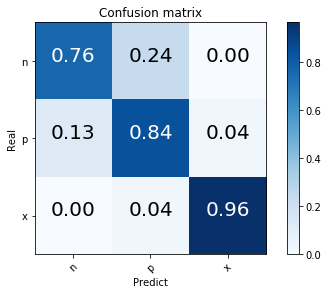

In [56]:
def voting_a(probs):
    true=[]
    pred=[]
    for k in sorted(probs,key=lambda k:probs[k]["real"]):
        true_value=probs[k]["real"]
        pred_value=[probs[k]["cnn"]["result"],probs[k]["tscnn"]["result"],probs[k]["yolo"]["result"],probs[k]["tsyolo"]["result"]]
        true.append(true_value)
        if pred_value.count(1)>=2:
            pred.append(1)
        elif pred_value.count(2)>=2:
            pred.append(2)
        else:
            pred.append(0)
    return np.asarray(true),np.asarray(pred)
t,p=voting_a(probs)
evaluate(t,p)
plot_confusion_matrix(t,p,["n","p","x"])

## Sum of probability


SCOREs
+-------+-----------+--------+--------+---------+
| Label | Precision | Recall | FScore | Support |
+=======+===========+========+========+=========+
| 0     | 0.856     | 0.755  | 0.802  | 110     |
+-------+-----------+--------+--------+---------+
| 1     | 0.764     | 0.855  | 0.807  | 110     |
+-------+-----------+--------+--------+---------+
| 2     | 0.973     | 0.973  | 0.973  | 110     |
+-------+-----------+--------+--------+---------+


 CONFUSION MATRIX
[[0.75454545 0.24545455 0.        ]
 [0.11818182 0.85454545 0.02727273]
 [0.00909091 0.01818182 0.97272727]]


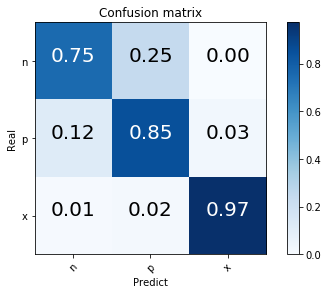

In [48]:
def probSum(probs,positive_thresh=2):
    true=[]
    pred=[]
    for k in sorted(probs,key=lambda k:probs[k]["real"]):
        true_value=probs[k]["real"]
        pred_probs=[probs[k]["cnn"]["prob"],probs[k]["tscnn"]["prob"],probs[k]["yolo"]["prob"],probs[k]["tsyolo"]["prob"]]
        true.append(true_value)
        pred_value=np.sum(np.asarray(pred_probs),axis=0)
        if pred_value[1]>positive_thresh:
            pred.append(1)
        else:
            pred.append(np.argmax(pred_value))
        #print(true[-1],pred_value,pred[-1])
    return np.asarray(true),np.asarray(pred)
t,p=probSum(probs,1.5)
evaluate(t,p)
plot_confusion_matrix(t,p,["n","p","x"])

## DC Tree

2.0 2.0
1.0 1.0
2.0 2.0
0.0 0.0
0.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
2.0 2.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
2.0 2.0
2.0 2.0
1.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
2.0 2.0
2.0 2.0
0.0 0.0
2.0 2.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
2.0 2.0
2.0 2.0
2.0 2.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 1.0
1.0 1.0
1.0 1.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
1.0 1.0
2.0 2.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
2.0 2.0
0.0 0.0
2.0 2.0
0.0 0.0
0.0 0.0
2.0 2.0
1.0 1.0
1.0 1.0
1.0 1.0
2.0 2.0
0.0 0.0
0.0 0.0
1.0 0.0
2.0 2.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 0.0
0.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 0.0
2.0 2.0
2.0 2.0
0.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 0.0
0.0 1.0
2.0 2.0
2.0 2.0
1.0 0.0
2.0 2.0
1.0 1.0
0.0 0.0
1.0 1.0
2.0 2.0
1.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
1.0 0.0
2.0 2.0
1.0 1.0
1.0 1.0
0.0 1.0
2.0 2.0
0.0 0.0
1.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
1.0 1.0
1.0 1.0
1.0 2.0
0.0 0.0
1.0 1.0
2.0 2.0
1.0 1.0
2.0 2.0
1.0 0.0
1.0 1.0
2.0 2.0
2.0 2.0
1.0 1.0
2.0 2.0


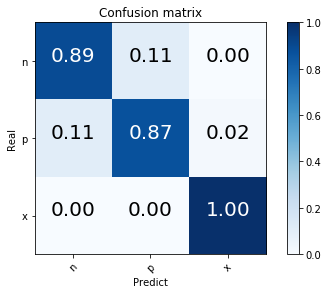

In [55]:
from sklearn import tree
from sklearn.model_selection import train_test_split
clf=tree.DecisionTreeClassifier()
x=[]
y=[]
for k,v in probs.items():
    y.append(v["real"])
    x.append(np.concatenate((v["cnn"]["prob"],v["tscnn"]["prob"],v["yolo"]["prob"],v["tsyolo"]["prob"])))
x=np.asarray(x)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6)
m=clf.fit(X_train,y_train)
y_pred=m.predict(X_test)
for yy,pp in zip(y_test,y_pred):
    print(yy,pp)
y_predict=m.predict(x)
evaluate(y,y_predict)
plot_confusion_matrix(y,y_predict,["n","p","x"])